/kaggle/input/covid19-global-forecasting-week-2/submission.csv
/kaggle/input/covid19-global-forecasting-week-2/test.csv
/kaggle/input/covid19-global-forecasting-week-2/train.csv


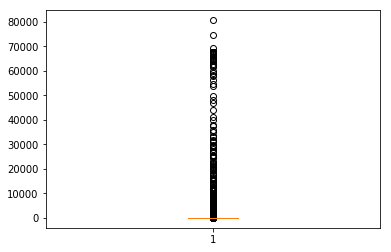

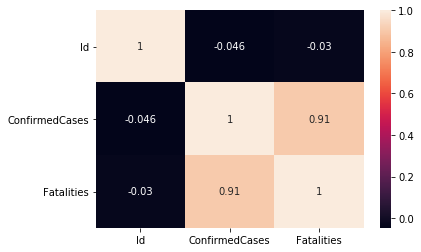

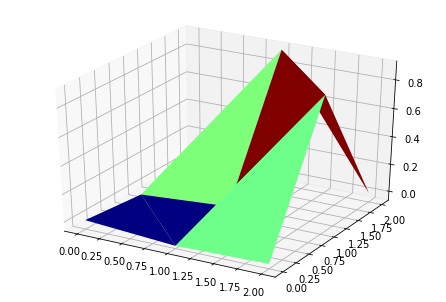

Text(0.5, 0, 'Infected Date')

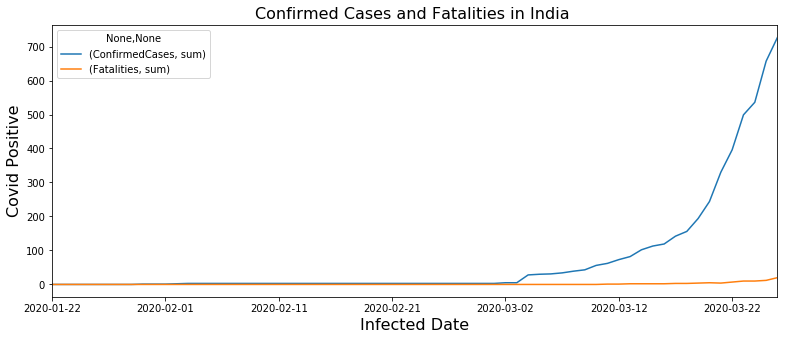

In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from scipy.stats import trim_mean 
import sklearn as sk 

datatest= pd.read_csv("../input/covid19-global-forecasting-week-2/test.csv") 
datatrain = pd.read_csv("../input/covid19-global-forecasting-week-2/train.csv")
datatrain.describe()

#boxplot for fatalities Global Covid Forecast
y = list(datatrain.ConfirmedCases) 
plt.boxplot(y) 
plt.show()


#boxplot for fatalities Global Covid Forecast
y = list(datatrain.Fatalities) 
plt.boxplot(y) 
plt.show()
  
# generating correlation heatmap 
sns.heatmap(datatrain.corr(), annot = True) 
  
# posting correlation heatmap to output console  
plt.show() 







# generating correlation data 
df = datatrain.corr() 
df.index = range(0, len(df)) 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
df = df.astype(object) 

''' Generating coordinates with 
corresponding correlation values '''
for i in range(0, len(df)): 
	for j in range(0, len(df)): 
		if i != j: 
			df.iloc[i, j] = (i, j, df.iloc[i, j]) 
		else : 
			df.iloc[i, j] = (i, j, 0) 

df_list = [] 

# flattening dataframe values 
for sub_list in df.values: 
	df_list.extend(sub_list) 

# converting list of tuples into trivariate dataframe 
plot_df = pd.DataFrame(df_list) 

fig = plt.figure() 
ax = Axes3D(fig) 

# plotting 3D trisurface plot 
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2], 
					cmap = cm.jet, linewidth = 0.2) 

plt.show() 


covid_affected_India= datatrain[datatrain['Country_Region']=='India'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
covid_death_India = datatrain[datatrain['Country_Region']=='India'].groupby(['Date']).agg({'Fatalities':['sum']})
covid_in_India = covid_affected_India.join(covid_death_India)

fig, (ax1) = plt.subplots(1, figsize=(13,5))
covid_in_India.plot(ax=ax1,)
ax1.set_title("Confirmed Cases and Fatalities in India ", size=16)
ax1.set_ylabel("Covid Positive", size=16)
ax1.set_xlabel("Infected Date", size=16)

